In [6]:
# plots are shown below the code as opposed to in a new window
# to install libraries to go terminal and use pip install ...
%matplotlib inline 
%precision 16 
import numpy                      #
import matplotlib                 #
import matplotlib.pyplot as plt   # plot module
import pandas as pd               # used for importing data and creating dataframes 
import os                         # allows you to easily change directories
from operator import itemgetter   # Allows us to find groups of consecutive numbers
from itertools import groupby     # useful for finding sets of dicharges/recoveries/charges

from scipy.special import erf     # error function (erf)

# matplotlib.style.use('default')

matplotlib.rcParams['lines.linewidth'] = 4    # change the default line thickness for plots to 4

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}            # change the default font size and type for axes labels and ticks

plt.rc('font', **font)

# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

import re



def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text): # allows for the more natural sorting of text (1, 2, 3, ... instead of 1, 10, 2, 3,...)
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

def get_sec(time_str):
    dh, m, s = time_str.split(':')
    d, h     = dh.split('d')
    return int(d)*24*3600 + int(h) * 3600 + int(m) * 60 + float(s)

def nice_grid(ax,x_lim,x_maj,x_min,y_lim,y_maj,y_min):
    # major ticks every 20, minor ticks every 5                                      
    major_ticks_x = numpy.arange(x_lim[0],x_lim[1]*1.01, x_maj)
    minor_ticks_x = numpy.arange(x_lim[0],x_lim[1]*1.01, x_min)

    major_ticks_y = numpy.arange(y_lim[0],y_lim[1]*1.01, y_maj)
    minor_ticks_y = numpy.arange(y_lim[0],y_lim[1]*1.01, y_min)

    ax.set_xticks(major_ticks_x)                                                       
    ax.set_xticks(minor_ticks_x, minor=True)                                           
    ax.set_yticks(major_ticks_y)                                                       
    ax.set_yticks(minor_ticks_y, minor=True)                                           

    # and a corresponding grid                                                       

    ax.grid(which='both')                                                            

    # or if you want differnet settings for the grids:                               
    ax.grid(which='minor', alpha=0.3)                                                
    ax.grid(which='major', alpha=0.7)

    ax.tick_params(pad=8)
    
csfont = {'fontname':'Serif'}

# Porous Electrode

['Elect_Conc', 'Solid_Conc', 'Equivalence', 'mAhg', 'Rxn_Rate', 'State', 'Solution_Pot', 'Time', 'Position', 'Theta_Beta', 'Voltage']
67
1.1
1.27319
1.6197
1.90123
2.18276
2.4643
2.51242
2.51242


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

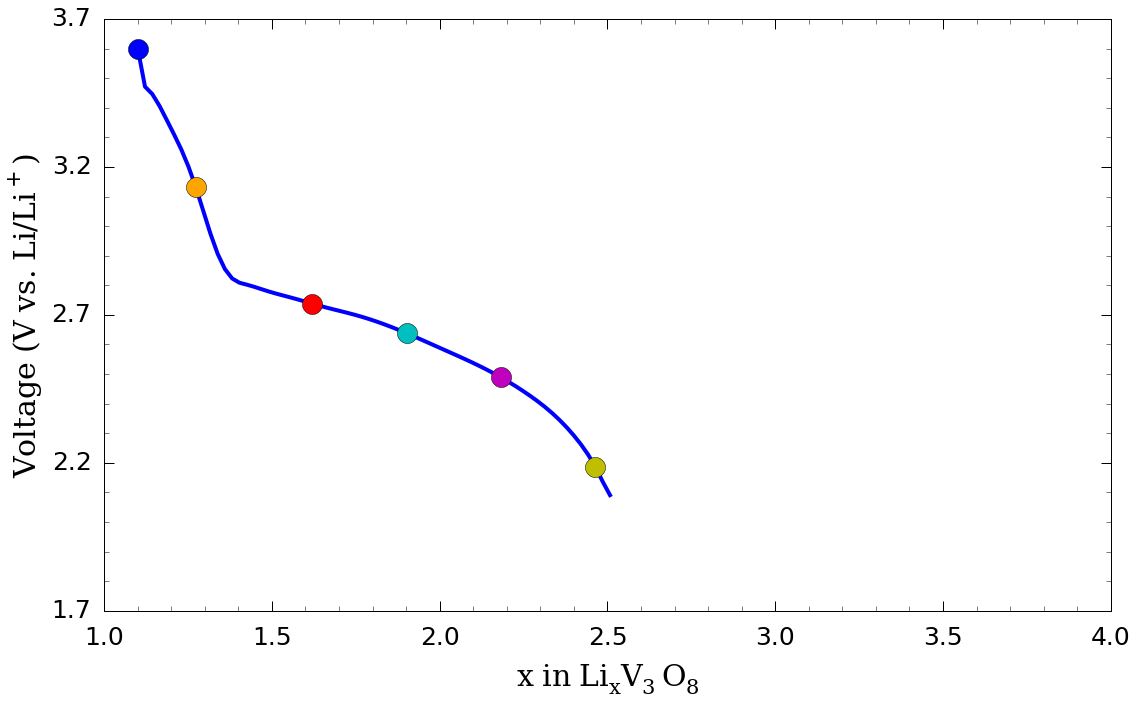

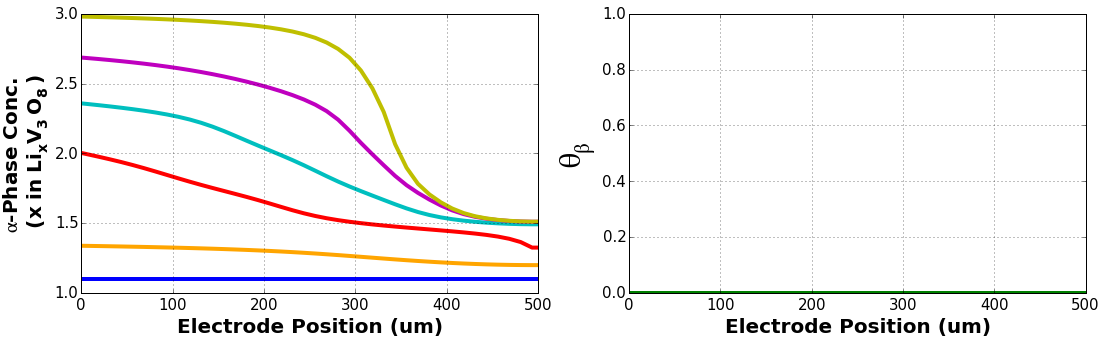

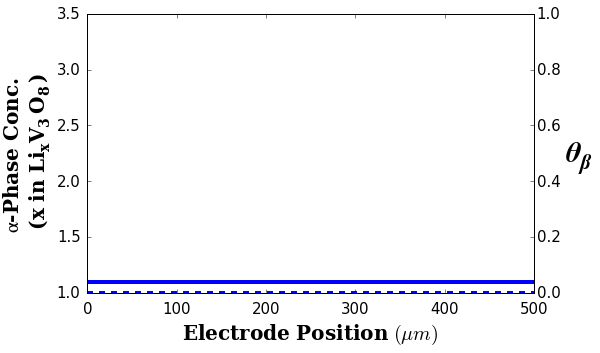

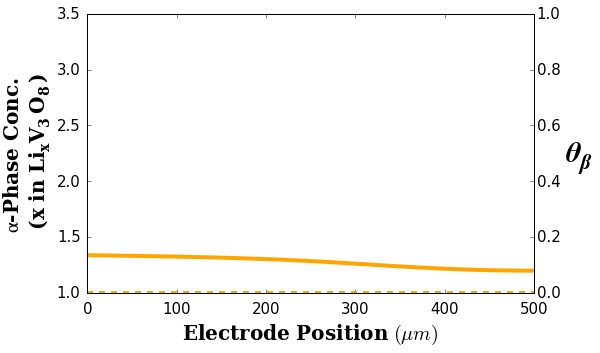

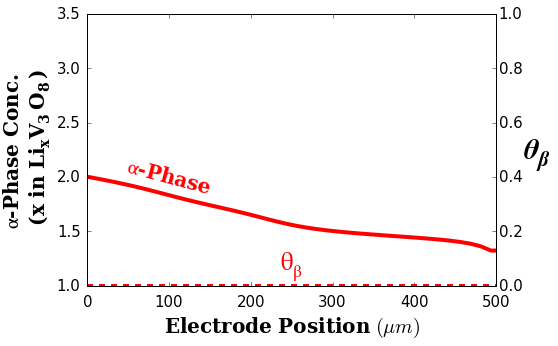

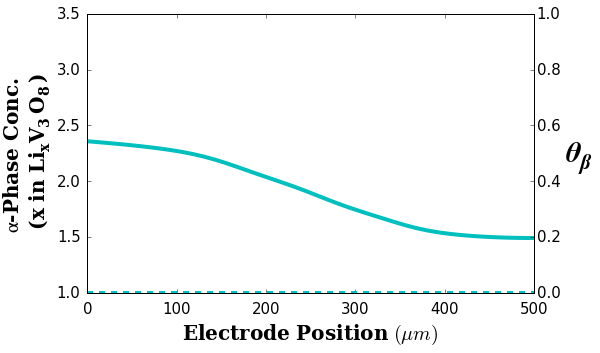

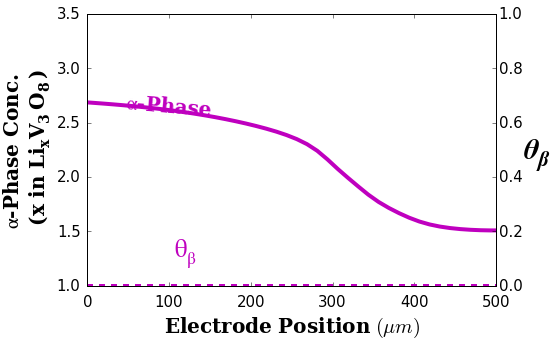

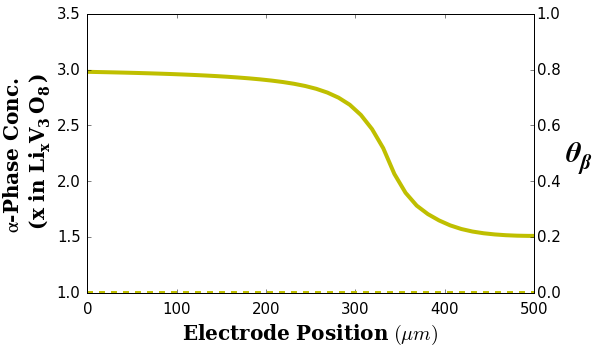

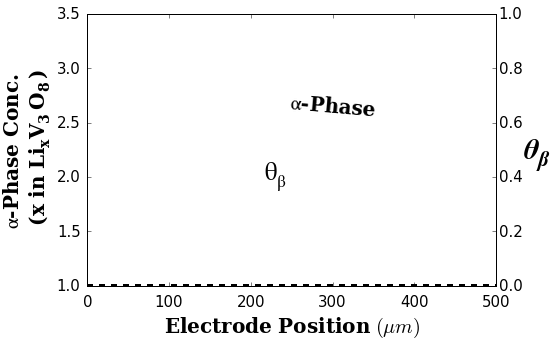

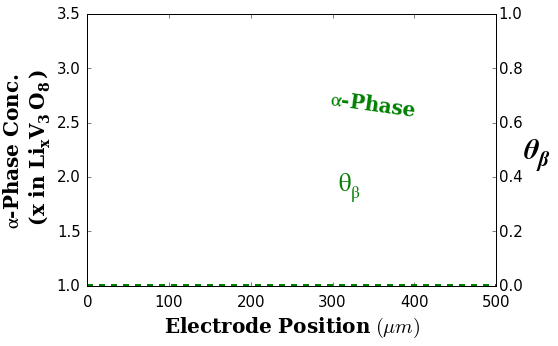

In [11]:
# directory = "/Users/nicholasbrady/Desktop/Fortran Codes/Code_Structure/Finite_Volume/ElectrochemicalProblems/Electrode_Scale/MultiScale/Crystal/Vanadium/Operando/" \
# +"C_Rate/Paper_Parameters/NJ_202"

# directory = "/Users/nicholasbrady/Desktop/Fortran Codes/Code_Structure/Finite_Volume/ElectrochemicalProblems/Electrode_Scale/MultiScale/Crystal/Vanadium/Operando/" \
# + "Parameter_Estimation/Sobol_Sampling/Fixed_Porosity/Paper_Parameter"

# directory = "/Users/nicholasbrady/Desktop/Fortran Codes/Code_Structure/Finite_Volume/ElectrochemicalProblems/Electrode_Scale/MultiScale/Crystal/Vanadium/Operando/" \
# + "Parameter_Estimation/Sobol_Sampling/Paper_Parameter"

directory = "/Users/nicholasbrady/Desktop/Fortran Codes/Code_Structure/Finite_Volume/ElectrochemicalProblems/Electrode_Scale/Rectangular/Vanadium/550/4/1/1/"

os.chdir(directory)

# os.chdir('18')
    
# Function 

######## FIGURES ##########
Electrochem_Meas_Sim = plt.figure(100,figsize=(16, 10), dpi= 300) # plot the positional data during discharge

sim_alpha_beta_profile_condense = plt.figure(102, figsize=(9*2,5), dpi=300) # plot the positional data during charge
alpha_beta_profile_sim_EDXRD = plt.figure(103, figsize=(9*2,5), dpi=300)

beta_profile_sim_EDXRD = plt.figure(104, figsize=(16,10), dpi=300)

rxn_elect_conc_fig     = plt.figure(105, figsize=(16,10), dpi=300)

# indices_D = [o for o, x in enumerate(exper_operando_500['C18']['State']) if x == "D"]
# end_of_D  = indices_D[-1]

############################################################
############ EXPERIMENTAL ELECTROCHEMCIAL DATA #############
############################################################

# try:
#     discharge_time = exper_operando_500['C18']['StepTime (hours)'][end_of_D]
# except KeyError:
#     try:
#         discharge_time = exper_operando_500['C18']['StepTime (h)'][end_of_D]
#     except KeyError:
#         discharge_time = exper_operando_500['C18']['StepTime'][end_of_D]

# current_mAg = exper_operando_500['C18']['mAh/g'][end_of_D]/discharge_time

# current_mAg = str(round(current_mAg, 2))

ax = Electrochem_Meas_Sim.add_subplot(1,1,1)
# ax.plot(exper_operando_500['C18']['Lix'][indices_D],exper_operando_500['C18']['Volts'][indices_D],'k--')
# ax.grid(True)
# ax.legend(['Experiment - C/18 (' + current_mAg + ' mA/g)'])
ax.set_xlabel(r'$\mathregular{x\ in\ Li_xV_3O_8}$', fontsize=25, **csfont)
ax.set_ylabel(r"$\mathregular{Voltage\ (V\ vs\ Li^+/Li)}$", fontsize=25, **csfont)



#__________________________________________________________#

############################################################
############# SIMULATED ELECTROCHEMCIAL DATA ###############
############################################################

##### Agglomerate Data (vs Position)
data = numpy.genfromtxt('Time_Voltage_Position.txt',dtype=None,skip_header=2) # get the data from 'Time_Voltage.txt'

data_new = numpy.zeros((len(data),len(data[0]))) 

# The first "column" of data contains the State condition which is a string so we do not want to 
# incorporate that information into data_new, instead we will get that information and put it in a list
StateList = [None] * len(data)

for l in range (0,len(data[0])):
    for k in range (0,len(data)): # reads column by column, instead of row by row

        if l == 0: # first column is the State ('D','C','R')
            StateList[k] = data[k][l]
        else:
            data_new[k,l] = data[k][l]

sim_agg = {} # simulation dictionary
with open("Time_Voltage_Position.txt") as f:
    count = 1
    for line in f:
        if count == 1:
            headers = line.split() # first row as column headers
            count += 1
        else:
            break


# define the column headers as dictionary keys
for n in range(0,len(headers)):
    if n == 0: #headers[0] == 'State':
        sim_agg[headers[n]] = StateList
    else:
        sim_agg[headers[n]] = data_new[:,n]

# find all indices that correspond to discharge, charge
indices_D = [o for o, x in enumerate(sim_agg['State']) if x == "D"]
indices_C = [o for o, x in enumerate(sim_agg['State']) if x == "C"]

# end of discharge, charge indices
end_of_D = indices_D[-1]
# end_of_C = indices_C[-1]

print sim_agg.keys()
print len(numpy.unique(sim_agg['Time']))
NJ = len((sim_agg['Time']))/len(numpy.unique(sim_agg['Time']))

#############################
#### Plot Discharge Data ####
#############################
ax = Electrochem_Meas_Sim.add_subplot(1,1,1)

### Plot simulated voltage vs equivalence data
unique_times, unique_ind = numpy.unique(sim_agg['Time'], return_index=True)
unique_Pos = numpy.unique(sim_agg['Position'])
# want the xmax time and voltage
unique_ind += (NJ-1)
ax.plot(sim_agg['Equivalence'][unique_ind], sim_agg['Voltage'][unique_ind])

# ax.grid(True)
ax.set_xlim([1.0, 4.0])
ax.set_ylim([1.7, 3.7])
ax.tick_params(axis='both', which='major', labelsize=20) ## Change the tick label size
ax.tick_params(axis='both', which='major', length=10)
ax.tick_params(axis='both', which='minor', length=5)
ax.set_xlabel('$\mathregular{x\ in\ Li_{x}V_3O_8}$', fontsize = 30, **csfont)
ax.set_ylabel('$\mathregular{Voltage\ (V\ vs.\ Li/Li^+)}$', fontsize = 30, **csfont)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

major_ticks_x = numpy.arange(xmin, xmax*1.01, 0.5)
minor_ticks_x = numpy.arange(xmin, xmax*1.01, 0.1)

major_ticks_y = numpy.arange(ymin, ymax*1.01, 0.5)
minor_ticks_y = numpy.arange(ymin, ymax*1.01, 0.1)

ax.set_xticks(major_ticks_x)                                                       
ax.set_xticks(minor_ticks_x, minor=True)                                           
ax.set_yticks(major_ticks_y)                                                       
ax.set_yticks(minor_ticks_y, minor=True)                                           

ax.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='on', \
              length=10, width=1, labelsize=25, pad=15 )

ax.xaxis.labelpad = 12
ax.yaxis.labelpad = 8

os.chdir("/Users/nicholasbrady/Google Drive/School/Academic/West Research/Research Papers/Vanadium/operando/Paper_Figures")
Electrochem_Meas_Sim.tight_layout()
Electrochem_Meas_Sim.savefig('Fig4_Relaxation_Beta_Phase.eps', format='eps', dpi = 300)


color_scheme = ['b','orange','r','c','m', 'y', 'k', 'g', 'saddlebrown']
ii = 0

## Plot Positional Data
scan_Equivs = [1.1, 1.28, 1.61, 1.90, 2.18, 2.47, 2.76, 3.05] #, 3.34, 3.62]

for plt_pos in scan_Equivs:
    # Find the indices that are discharge for each cycle
    value = min(abs(sim_agg['Equivalence'] - plt_pos))
    value += plt_pos
    plot_ind = [o for o, x in enumerate(sim_agg['Equivalence']) if x == value and sim_agg['State'][o] == 'D']

    if not(plot_ind):
        value = min(abs(sim_agg['Equivalence'] - plt_pos))
        value = plt_pos - value
        plot_ind = [o for o, x in enumerate(sim_agg['Equivalence']) if x == value and sim_agg['State'][o] == 'D']

    print value


    if plot_ind: # if plot_ind is not empty, then plot the first index on the voltage plot
        ax = Electrochem_Meas_Sim.add_subplot(1,1,1)
        ax.plot(sim_agg['Equivalence'][plot_ind[NJ-1]], sim_agg['Voltage'][plot_ind[NJ-1]], 
                'o', c=color_scheme[ii%len(color_scheme)], markersize = 20)


    #### PLOT Alpha and Beta Profiles on same axes ####

    sim_alpha_beta_together = plt.figure(2000+ii, figsize=(8, 5), dpi= 300)
    ax = sim_alpha_beta_together.add_subplot(1,1,1)
    a, = ax.plot(sim_agg['Position'][plot_ind]*1e4, sim_agg['Solid_Conc'][plot_ind], c = color_scheme[ii], label = '$\mathregular{\\alpha}$-Phase')
#     ax.grid(True)
    ax.set_ylim([1,3.5])
    ax.set_ylabel('$\mathregular{\\alpha}$-Phase Conc. \n ($\mathregular{x\ in\ Li_{x}V_3O_8}$)', fontweight = 'bold', fontsize = '20', **csfont)
    axt = ax.twinx()
    b, = axt.plot(sim_agg['Position'][plot_ind]*1e4, sim_agg['Theta_Beta'][plot_ind], '--', c = color_scheme[ii], label = '$\mathregular{\\beta}$-Phase')
    axt.set_ylim([0,1])
    axt.set_ylabel(r'$\mathregular{\theta_{\beta}}$', fontweight = 'bold', fontstyle = 'italic', fontsize = '30', rotation = 0, **csfont)
    ax.set_xlabel(r'$\mathregular{Electrode\ Position}\ (\mu m)$', fontweight='bold', fontsize = '20', **csfont)
    
    ax.tick_params(pad=8)
    
    axt.yaxis.set_label_coords(1.1,0.55)
    

    
    if ii == 2:
        ax.text(100,2.0,'$\mathregular{\\alpha}$-Phase', fontsize=20, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = -15, **csfont)
        axt.text(250,0.07,'$\mathregular{\\theta_{\\beta}}$', fontsize=25, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = 0, **csfont)

        sim_alpha_beta_together.tight_layout()
        sim_alpha_beta_together.savefig('Fig4_1_Inset.eps', format='eps', dpi = 300)
    
    elif ii == 4:
        ax.text(100,2.65,'$\mathregular{\\alpha}$-Phase', fontsize=20, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = -5, **csfont)
        axt.text(120,0.12,'$\mathregular{\\theta_{\\beta}}$', fontsize=25, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = 0, **csfont)
        
        sim_alpha_beta_together.tight_layout()
        sim_alpha_beta_together.savefig('Fig4_2_Inset.eps', format='eps', dpi = 300)
        
    elif ii == 6:
        ax.text(300,2.65,'$\mathregular{\\alpha}$-Phase', fontsize=20, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = -5, **csfont)
        axt.text(230,0.4,'$\mathregular{\\theta_{\\beta}}$', fontsize=25, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = 0, **csfont)
        
        sim_alpha_beta_together.tight_layout()
        sim_alpha_beta_together.savefig('Fig4_3_Inset.eps', format='eps', dpi = 300)
        
    elif ii == 7:
        ax.text(350,2.67,'$\mathregular{\\alpha}$-Phase', fontsize=20, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = -8, **csfont)
        axt.text(320,0.3,'$\mathregular{\\theta_{\\beta}}$', fontsize=25, fontweight='bold',ha='center',va='bottom',clip_on=True, color = color_scheme[ii], \
               rotation = 0, **csfont) 
        
        sim_alpha_beta_together.tight_layout()
        sim_alpha_beta_together.savefig('Fig4_4_Inset.eps', format='eps', dpi = 300)
        
        sim_alpha_beta_together = plt.figure(9000+ii, figsize=(8, 5), dpi= 300)

    ax = sim_alpha_beta_profile_condense.add_subplot(1,2,1)
    ax.plot(sim_agg['Position'][plot_ind]*1e4, sim_agg['Solid_Conc'][plot_ind], c = color_scheme[ii])
    ax.grid(True)
    ax.set_ylim([1,3])
    ax.set_ylabel('$\mathregular{\\alpha}$-Phase Conc. \n ($\mathregular{x\ in\ Li_{x}V_3O_8}$)', fontweight = 'bold', fontsize = '20')
    ax.set_xlabel(r'Electrode Position (um)', fontweight = 'bold', fontsize = '20')

    ax = sim_alpha_beta_profile_condense.add_subplot(1,2,2)    
    ax.plot(sim_agg['Position'][plot_ind]*1e4, sim_agg['Theta_Beta'][plot_ind], c = color_scheme[ii])
    ax.grid(True)
    ax.set_ylim([0,1])
    ax.set_ylabel(r'$\mathregular{\theta_{\beta}}$', fontweight = 'bold', fontsize = '30')
    ax.set_xlabel(r'Electrode Position (um)', fontweight = 'bold', fontsize = '20')

    ii += 1

time_array = []
equiv_array = numpy.unique(sim_agg['Equivalence'])
Li_rich_array = []
theta_beta_dict = {}
theta_beta_dict['0'] = []
theta_beta_dict['5'] = []
theta_beta_dict['10'] = []
theta_0   = []
theta_100 = []
theta_200 = []
theta_300 = []
theta_400 = []
theta_500 = []

rxn_0   = []
rxn_100 = []
rxn_200 = []
rxn_300 = []
rxn_400 = []
rxn_500 = []
# rxn_500 = numpy.zeros(len(unique_times))

elect_0   = []
elect_100 = []
elect_200 = []
elect_300 = []
elect_400 = []
elect_500 = []

ind_beta = {}
for time in unique_times:
    ind = [o for o, x in enumerate(sim_agg['Time']) if x == time and sim_agg['State'][o] == 'D']

    ind_alpha   = sim_agg['Solid_Conc'][ind] > 2.0

    ind_beta['0']  = sim_agg['Theta_Beta'][ind] > 0.0
    ind_beta['5']  = sim_agg['Theta_Beta'][ind] > 0.05
    ind_beta['10'] = sim_agg['Theta_Beta'][ind] > 0.10

    electrode_position = [0, 93.75, 193.75, 293.75] # 500
    electrode_position = numpy.linspace(0,561,6)
    electrode_position = [0, 100., 200., 300., 400., 500.] # 500

#     for jk in range(0,len(electrode_position)):
#         electrode_position[jk] = round(electrode_position[jk],2)
    
#     print electrode_position
    
    for elect_pos in electrode_position:

        # Find the simulated electrode position closest to the desired position 103. is closest to 100 for instance
        obj_list = abs(sim_agg['Position'][0:42]*1e4 - elect_pos)
        objmin = min(obj_list)
        objmin_ind = [i for i, x in enumerate(obj_list) if x == min(obj_list)]
        elect_pos_close = sim_agg['Position'][objmin_ind]*1e4

        pos = [o for o, x in enumerate(sim_agg['Time']) if x == time and sim_agg['State'][o] == 'D' and sim_agg['Position'][o]*1e4 == elect_pos_close]

        if elect_pos == electrode_position[0]:
            theta_0.append(sim_agg['Theta_Beta'][pos])
            rxn_0.append(sim_agg['Rxn_Rate'][pos])
            elect_0.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[1]:
            theta_100.append(sim_agg['Theta_Beta'][pos])
            rxn_100.append(sim_agg['Rxn_Rate'][pos])
            elect_100.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[2]:
            theta_200.append(sim_agg['Theta_Beta'][pos])
            rxn_200.append(sim_agg['Rxn_Rate'][pos])
            elect_200.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[3]:
            theta_300.append(sim_agg['Theta_Beta'][pos])
            rxn_300.append(sim_agg['Rxn_Rate'][pos])
            elect_300.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[4]:
            theta_400.append(sim_agg['Theta_Beta'][pos])
            rxn_400.append(sim_agg['Rxn_Rate'][pos])
            elect_400.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[5]:
            theta_500.append(sim_agg['Theta_Beta'][pos])
            rxn_500.append(sim_agg['Rxn_Rate'][pos])
            elect_500.append(sim_agg['Elect_Conc'][pos])

    if any(ind_alpha == True):
        interface_alpha = unique_Pos[max([o for o, x in enumerate(ind_alpha) if x == True])]*1e4
        Li_rich_array.append(interface_alpha)

    else:
        Li_rich_array.append(0)
    
    for key in ind_beta.keys():
        if any(ind_beta[key] == True):
            time_array.append(time)

            interface_beta = unique_Pos[max([o for o, x in enumerate(ind_beta[key]) if x == True])]*1e4
            theta_beta_dict[key].append(interface_beta)

        else:
            time_array.append(time)
            theta_beta_dict[key].append(0)

ax = rxn_elect_conc_fig.add_subplot(2,2,1)
ax.plot(equiv_array, numpy.array(elect_0)*10**3)
ax.plot(equiv_array, numpy.array(elect_100)*10**3)
ax.plot(equiv_array, numpy.array(elect_200)*10**3)
ax.plot(equiv_array, numpy.array(elect_300)*10**3)
ax.plot(equiv_array, numpy.array(elect_400)*10**3)
ax.plot(equiv_array, numpy.array(elect_500)*10**3)
            
            
ax = rxn_elect_conc_fig.add_subplot(2,2,3)
ax.plot(equiv_array, numpy.array(rxn_0)*10**6)
ax.plot(equiv_array, numpy.array(rxn_100)*10**6)
ax.plot(equiv_array, numpy.array(rxn_200)*10**6)
ax.plot(equiv_array, numpy.array(rxn_300)*10**6)
ax.plot(equiv_array, numpy.array(rxn_400)*10**6)
ax.plot(equiv_array, numpy.array(rxn_500)*10**6)
            
            
### Experimental Electrode Interface Positions
## Assume full scan is 800 um and takes 80 min. 
## based on the applied current, 80 minutes results in x = 0.28 electrons being passed
## here we are going to assume that the x errorbars are +/- 2 minutes which results in x = 0.28/80*2 = 0.007
## we assume that the x error bars only correspond to the time around when the scan goes over the interface

exper_Equiv = [1.10, 1.28, 1.61, 1.90, 2.18, 2.47, 2.76, 3.05, 3.34, 3.62]
exper_alpha = [0, 0, 0, 258, 317, 402, 447, 512, 561, 561]
exper_beta  = [0, 0, 0, 0, 107, 235, 317, 424, 544, 561]

full_pos = [x+139 for x in exper_beta]

scan_part_equiv = [x*0.28/800 for x in full_pos]

adj_scan_equiv  = [x-0.28/2 for x in exper_Equiv] + scan_part_equiv

adj_scan_equiv =  [x + y for x, y in zip(adj_scan_equiv, scan_part_equiv)]

adj_scan_equiv[0] = exper_Equiv[0]

adj_scan_equiv
ax = alpha_beta_profile_sim_EDXRD.add_subplot(1,2,1)    
ax.plot(equiv_array, Li_rich_array)
ax.errorbar(adj_scan_equiv[0], exper_alpha[0], yerr = 20, markersize = 6, fmt = 'ko', capthick=2, capsize=5, zorder = 300)
ax.errorbar(adj_scan_equiv[1:len(exper_Equiv)], exper_alpha[1:len(exper_alpha)], xerr = 0.28/80*2, yerr = 20, markersize = 6, fmt = 'ko', capthick=2, capsize=5, zorder = 300)
ax.grid(True)
ax.set_ylim([580, -30])
ax.set_ylabel(r'Electrode Position (um)', fontweight = 'bold', fontsize = '20')
ax.set_xlabel('$\mathregular{x\ in\ Li_{x}V_3O_8}$',fontweight='bold', fontsize = '20')

ax = alpha_beta_profile_sim_EDXRD.add_subplot(1,2,2)    
ax.plot(equiv_array, theta_beta_dict['0'], 'b-')
ax.plot(equiv_array, theta_beta_dict['5'], 'r-')
ax.plot(equiv_array, theta_beta_dict['10'], 'g-')
ax.errorbar(adj_scan_equiv[0], exper_beta[0], yerr = 20, markersize = 10, fmt = 'ko', capthick=2, capsize=5, zorder = 300)
ax.errorbar(adj_scan_equiv[1:len(exper_Equiv)], exper_beta[1:len(exper_beta)], xerr = 0.28/80*2, yerr = 20, markersize = 10, fmt = 'ko', capthick=2, capsize=5, zorder = 300)
ax.grid(True)
ax.set_ylim([580, -30])
ax.set_ylabel(r'Electrode Position (um)', fontweight = 'bold', fontsize = '20')
ax.set_xlabel('$\mathregular{x\ in\ Li_{x}V_3O_8}$',fontweight='bold', fontsize = '20')
ax.text(2.12,170,'0%', fontsize=20, fontweight='bold',ha='right',va='center',clip_on=True, color = 'b', \
               rotation = 0)
ax.text(3.15,380,'5%', fontsize=20, fontweight='bold',ha='left',va='center',clip_on=True, color = 'r', \
               rotation = 0)
ax.text(2.43,170,'10%', fontsize=20, fontweight='bold',ha='left',va='center',clip_on=True, color = 'g', \
               rotation = 0)

# plt.setp(L.texts, **csfont)
ax = beta_profile_sim_EDXRD.add_subplot(1,1,1)    
ax.plot(equiv_array, theta_beta_dict['0'], 'b-', linewidth = 6)
ax.plot(equiv_array, theta_beta_dict['5'], 'r-', linewidth = 6)
ax.plot(equiv_array, theta_beta_dict['10'], 'g-', linewidth = 6)
ax.errorbar(adj_scan_equiv[0], exper_beta[0], yerr = 20, markersize = 15, fmt = 'ko', capthick=4, capsize=7, zorder = 300)
ax.errorbar(adj_scan_equiv[1:len(exper_Equiv)], exper_beta[1:len(exper_beta)], xerr = 0.28/80*2, yerr = 20, markersize = 15, fmt = 'ko', capthick=4, capsize=7, zorder = 300)
# ax.grid(True)
ax.set_ylim([580, -30])
ax.set_xlim([1.0, 4.0])
ax.set_ylabel(r'$\mathregular{Electrode\ Position}\ (\mu m)$', fontweight='medium', fontsize = '40', **csfont)
ax.set_xlabel('$\mathregular{x\ in\ Li_{x}V_3O_8}$', fontsize = '40', **csfont)

ax.text(2.12,170,'0%', fontsize=40, fontweight='bold',ha='right',va='center',clip_on=True, color = 'b', \
               rotation = 0, **csfont)
ax.text(3.15,380,'5%', fontsize=40, fontweight='bold',ha='left',va='center',clip_on=True, color = 'r', \
               rotation = 0, **csfont)
ax.text(2.43,170,'10%', fontsize=40, fontweight='bold',ha='left',va='center',clip_on=True, color = 'g', \
               rotation = 0, **csfont)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

major_ticks_x = numpy.arange(xmin, xmax*1.01, 0.5)
minor_ticks_x = numpy.arange(xmin, xmax*1.01, 0.1)

ymin=500
ymax=-30
major_ticks_y = numpy.arange(ymin, ymax*1.01, -100)
ymin=580
ymax=-30
minor_ticks_y = numpy.arange(ymin, ymax*1.01, -20)

ax.set_xticks(major_ticks_x)                                                       
ax.set_xticks(minor_ticks_x, minor=True)                                           
ax.set_yticks(major_ticks_y)                                                       
ax.set_yticks(minor_ticks_y, minor=True)                                           

ax.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='on', \
              length=10, width=1, labelsize=25, pad=15 )

ax.tick_params(axis='both', which='major', length=10)
ax.tick_params(axis='both', which='minor', length=5)

ax.xaxis.labelpad = 12
ax.yaxis.labelpad = 10

os.chdir("/Users/nicholasbrady/Google Drive/School/Academic/West Research/Research Papers/Vanadium/operando/Paper_Figures")
beta_profile_sim_EDXRD.tight_layout()
beta_profile_sim_EDXRD.savefig('Fig_Detection_Limit_EDXRD.eps', format='eps', dpi = 300)

# Porous Electrode With Separator

['Elect_Conc', 'Solid_Conc', 'Equivalence', 'mAhg', 'Rxn_Rate', 'State', 'Solution_Pot', 'Time', 'Position', 'Theta_Beta', 'Voltage']
43
1.1
1.27319
1.6197
1.90123
1.98966
1.98966
1.98966
1.98966


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

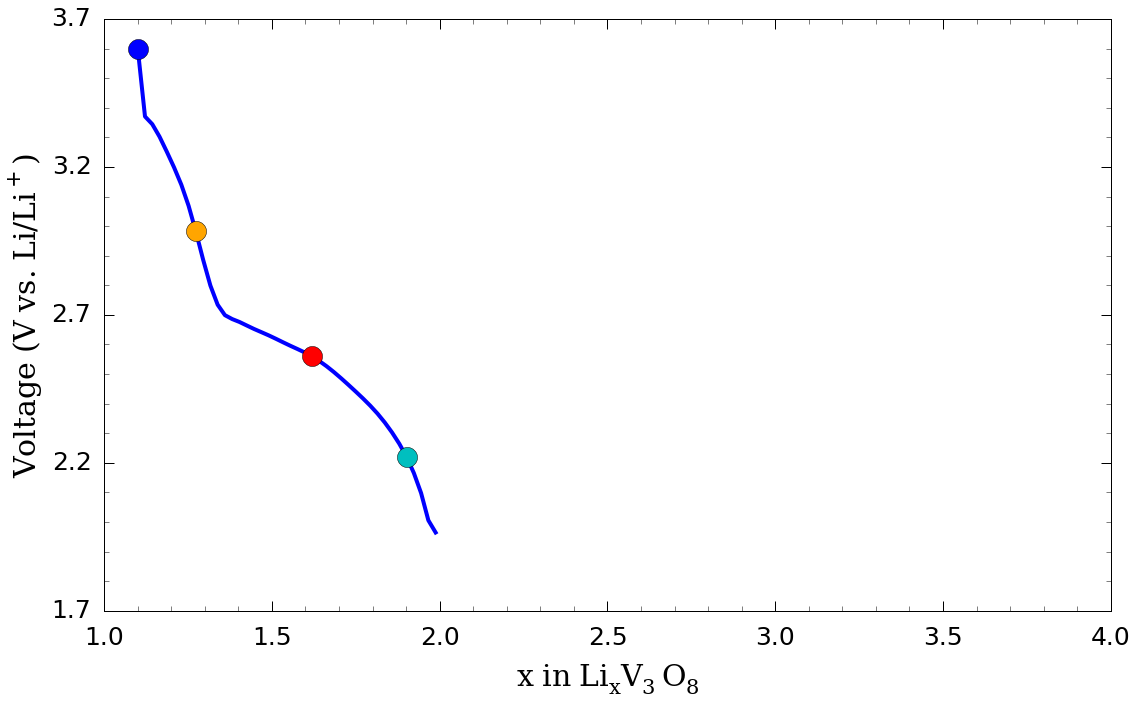

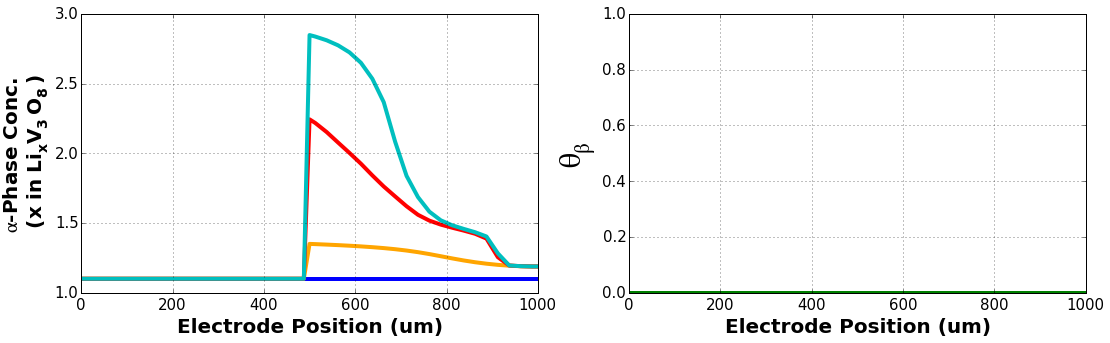

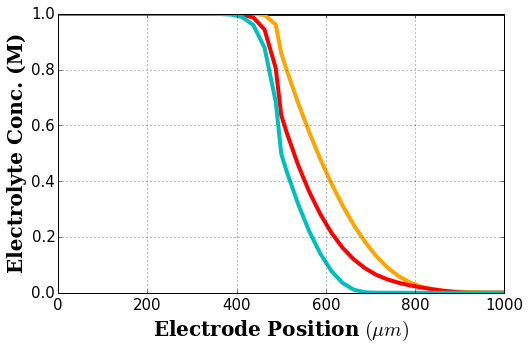

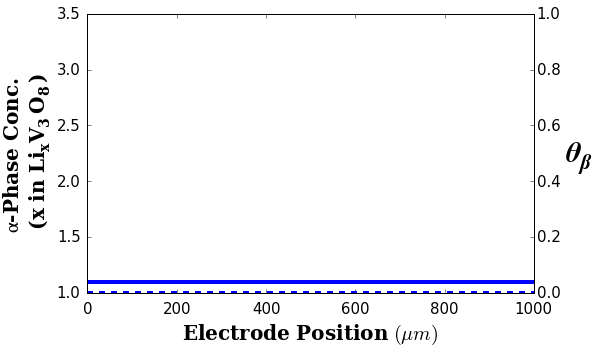

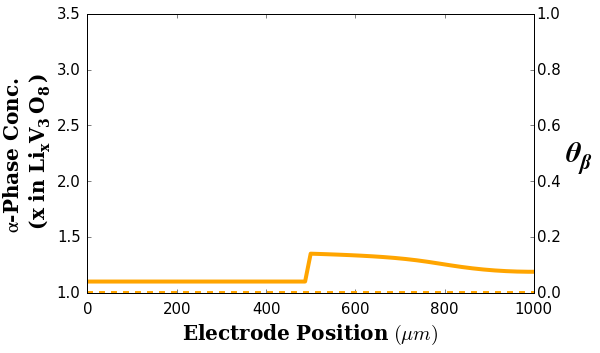

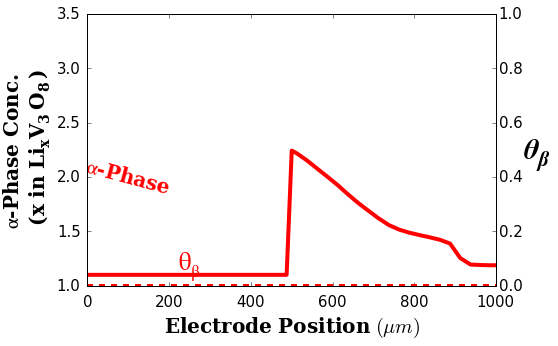

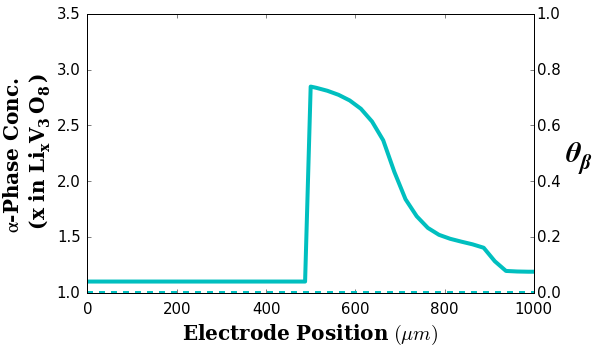

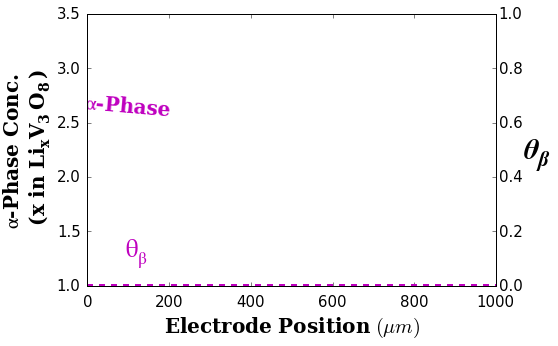

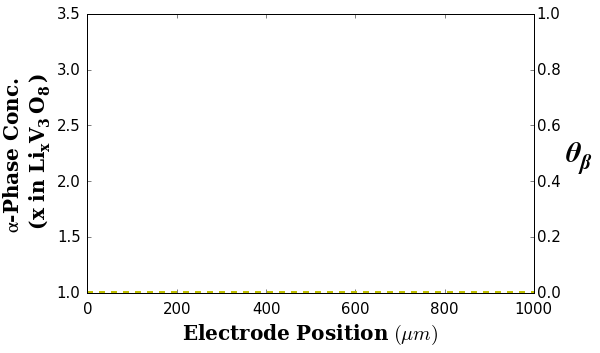

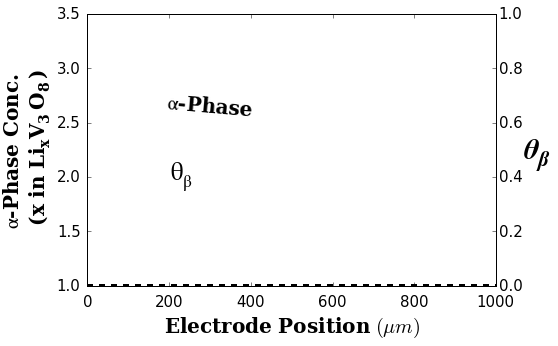

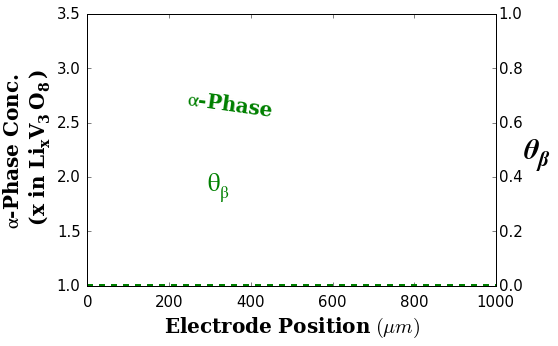

In [24]:
# directory = "/Users/nicholasbrady/Desktop/Fortran Codes/Code_Structure/Finite_Volume/ElectrochemicalProblems/Electrode_Scale/MultiScale/Crystal/Vanadium/Operando/" \
# +"C_Rate/Paper_Parameters/NJ_202"

# directory = "/Users/nicholasbrady/Desktop/Fortran Codes/Code_Structure/Finite_Volume/ElectrochemicalProblems/Electrode_Scale/MultiScale/Crystal/Vanadium/Operando/" \
# + "Parameter_Estimation/Sobol_Sampling/Fixed_Porosity/Paper_Parameter"

# directory = "/Users/nicholasbrady/Desktop/Fortran Codes/Code_Structure/Finite_Volume/ElectrochemicalProblems/Electrode_Scale/MultiScale/Crystal/Vanadium/Operando/" \
# + "Parameter_Estimation/Sobol_Sampling/Paper_Parameter"

directory = "/Users/nicholasbrady/Desktop/Fortran Codes/Code_Structure/Finite_Volume/ElectrochemicalProblems/Electrode_Scale/Rectangular/Vanadium/With_Separator/550/4/1/1/"

os.chdir(directory)

# os.chdir('18')
    
# Function 

######## FIGURES ##########
Electrochem_Meas_Sim = plt.figure(100,figsize=(16, 10), dpi= 300) # plot the positional data during discharge

sim_alpha_beta_profile_condense = plt.figure(102, figsize=(9*2,5), dpi=300) # plot the positional data during charge
alpha_beta_profile_sim_EDXRD = plt.figure(103, figsize=(9*2,5), dpi=300)

sim_electrolyte_conc_profiles = plt.figure(1031, figsize=(8,5), dpi=300)

beta_profile_sim_EDXRD = plt.figure(104, figsize=(16,10), dpi=300)

rxn_elect_conc_fig     = plt.figure(105, figsize=(16,10), dpi=300)

# indices_D = [o for o, x in enumerate(exper_operando_500['C18']['State']) if x == "D"]
# end_of_D  = indices_D[-1]

############################################################
############ EXPERIMENTAL ELECTROCHEMCIAL DATA #############
############################################################

# try:
#     discharge_time = exper_operando_500['C18']['StepTime (hours)'][end_of_D]
# except KeyError:
#     try:
#         discharge_time = exper_operando_500['C18']['StepTime (h)'][end_of_D]
#     except KeyError:
#         discharge_time = exper_operando_500['C18']['StepTime'][end_of_D]

# current_mAg = exper_operando_500['C18']['mAh/g'][end_of_D]/discharge_time

# current_mAg = str(round(current_mAg, 2))

ax = Electrochem_Meas_Sim.add_subplot(1,1,1)
# ax.plot(exper_operando_500['C18']['Lix'][indices_D],exper_operando_500['C18']['Volts'][indices_D],'k--')
# ax.grid(True)
# ax.legend(['Experiment - C/18 (' + current_mAg + ' mA/g)'])
ax.set_xlabel(r'$\mathregular{x\ in\ Li_xV_3O_8}$', fontsize=25, **csfont)
ax.set_ylabel(r"$\mathregular{Voltage\ (V\ vs\ Li^+/Li)}$", fontsize=25, **csfont)



#__________________________________________________________#

############################################################
############# SIMULATED ELECTROCHEMCIAL DATA ###############
############################################################

##### Agglomerate Data (vs Position)
data = numpy.genfromtxt('Time_Voltage_Position.txt',dtype=None,skip_header=2) # get the data from 'Time_Voltage.txt'

data_new = numpy.zeros((len(data),len(data[0]))) 

# The first "column" of data contains the State condition which is a string so we do not want to 
# incorporate that information into data_new, instead we will get that information and put it in a list
StateList = [None] * len(data)

for l in range (0,len(data[0])):
    for k in range (0,len(data)): # reads column by column, instead of row by row

        if l == 0: # first column is the State ('D','C','R')
            StateList[k] = data[k][l]
        else:
            data_new[k,l] = data[k][l]

sim_agg = {} # simulation dictionary
with open("Time_Voltage_Position.txt") as f:
    count = 1
    for line in f:
        if count == 1:
            headers = line.split() # first row as column headers
            count += 1
        else:
            break


# define the column headers as dictionary keys
for n in range(0,len(headers)):
    if n == 0: #headers[0] == 'State':
        sim_agg[headers[n]] = StateList
    else:
        sim_agg[headers[n]] = data_new[:,n]

# find all indices that correspond to discharge, charge
indices_D = [o for o, x in enumerate(sim_agg['State']) if x == "D"]
indices_C = [o for o, x in enumerate(sim_agg['State']) if x == "C"]

# end of discharge, charge indices
end_of_D = indices_D[-1]
# end_of_C = indices_C[-1]

print sim_agg.keys()
print len(numpy.unique(sim_agg['Time']))
NJ = len((sim_agg['Time']))/len(numpy.unique(sim_agg['Time']))

#############################
#### Plot Discharge Data ####
#############################
ax = Electrochem_Meas_Sim.add_subplot(1,1,1)

### Plot simulated voltage vs equivalence data
unique_times, unique_ind = numpy.unique(sim_agg['Time'], return_index=True)
unique_Pos = numpy.unique(sim_agg['Position'])
# want the xmax time and voltage
unique_ind += (NJ-1)
ax.plot(sim_agg['Equivalence'][unique_ind], sim_agg['Voltage'][unique_ind])

# ax.grid(True)
ax.set_xlim([1.0, 4.0])
ax.set_ylim([1.7, 3.7])
ax.tick_params(axis='both', which='major', labelsize=20) ## Change the tick label size
ax.tick_params(axis='both', which='major', length=10)
ax.tick_params(axis='both', which='minor', length=5)
ax.set_xlabel('$\mathregular{x\ in\ Li_{x}V_3O_8}$', fontsize = 30, **csfont)
ax.set_ylabel('$\mathregular{Voltage\ (V\ vs.\ Li/Li^+)}$', fontsize = 30, **csfont)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

major_ticks_x = numpy.arange(xmin, xmax*1.01, 0.5)
minor_ticks_x = numpy.arange(xmin, xmax*1.01, 0.1)

major_ticks_y = numpy.arange(ymin, ymax*1.01, 0.5)
minor_ticks_y = numpy.arange(ymin, ymax*1.01, 0.1)

ax.set_xticks(major_ticks_x)                                                       
ax.set_xticks(minor_ticks_x, minor=True)                                           
ax.set_yticks(major_ticks_y)                                                       
ax.set_yticks(minor_ticks_y, minor=True)                                           

ax.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='on', \
              length=10, width=1, labelsize=25, pad=15 )

ax.xaxis.labelpad = 12
ax.yaxis.labelpad = 8

os.chdir("/Users/nicholasbrady/Google Drive/School/Academic/West Research/Research Papers/Vanadium/operando/Paper_Figures")
Electrochem_Meas_Sim.tight_layout()
Electrochem_Meas_Sim.savefig('Fig4_Relaxation_Beta_Phase.eps', format='eps', dpi = 300)


color_scheme = ['b','orange','r','c','m', 'y', 'k', 'g', 'saddlebrown']
ii = 0

## Plot Positional Data
scan_Equivs = [1.1, 1.28, 1.61, 1.90, 2.18, 2.47, 2.76, 3.05] #, 3.34, 3.62]

for plt_pos in scan_Equivs:
    # Find the indices that are discharge for each cycle
    value = min(abs(sim_agg['Equivalence'] - plt_pos))
    value += plt_pos
    plot_ind = [o for o, x in enumerate(sim_agg['Equivalence']) if x == value and sim_agg['State'][o] == 'D']

    if not(plot_ind):
        value = min(abs(sim_agg['Equivalence'] - plt_pos))
        value = plt_pos - value
        plot_ind = [o for o, x in enumerate(sim_agg['Equivalence']) if x == value and sim_agg['State'][o] == 'D']

    print value


    if plot_ind: # if plot_ind is not empty, then plot the first index on the voltage plot
        ax = Electrochem_Meas_Sim.add_subplot(1,1,1)
        ax.plot(sim_agg['Equivalence'][plot_ind[NJ-1]], sim_agg['Voltage'][plot_ind[NJ-1]], 
                'o', c=color_scheme[ii%len(color_scheme)], markersize = 20)


    #### PLOT Alpha and Beta Profiles on same axes ####

    sim_alpha_beta_together = plt.figure(2000+ii, figsize=(8, 5), dpi= 300)
    ax = sim_alpha_beta_together.add_subplot(1,1,1)
    a, = ax.plot(sim_agg['Position'][plot_ind]*1e4, sim_agg['Solid_Conc'][plot_ind], c = color_scheme[ii], label = '$\mathregular{\\alpha}$-Phase')
#     ax.grid(True)
    ax.set_ylim([1,3.5])
    ax.set_ylabel('$\mathregular{\\alpha}$-Phase Conc. \n ($\mathregular{x\ in\ Li_{x}V_3O_8}$)', fontweight = 'bold', fontsize = '20', **csfont)
    axt = ax.twinx()
    b, = axt.plot(sim_agg['Position'][plot_ind]*1e4, sim_agg['Theta_Beta'][plot_ind], '--', c = color_scheme[ii], label = '$\mathregular{\\beta}$-Phase')
    axt.set_ylim([0,1])
    axt.set_ylabel(r'$\mathregular{\theta_{\beta}}$', fontweight = 'bold', fontstyle = 'italic', fontsize = '30', rotation = 0, **csfont)
    ax.set_xlabel(r'$\mathregular{Electrode\ Position}\ (\mu m)$', fontweight='bold', fontsize = '20', **csfont)
    
    ax.tick_params(pad=8)
    
    axt.yaxis.set_label_coords(1.1,0.55)
    

    
    if ii == 2:
        ax.text(100,2.0,'$\mathregular{\\alpha}$-Phase', fontsize=20, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = -15, **csfont)
        axt.text(250,0.07,'$\mathregular{\\theta_{\\beta}}$', fontsize=25, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = 0, **csfont)

        sim_alpha_beta_together.tight_layout()
        sim_alpha_beta_together.savefig('Fig4_1_Inset.eps', format='eps', dpi = 300)
    
    elif ii == 4:
        ax.text(100,2.65,'$\mathregular{\\alpha}$-Phase', fontsize=20, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = -5, **csfont)
        axt.text(120,0.12,'$\mathregular{\\theta_{\\beta}}$', fontsize=25, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = 0, **csfont)
        
        sim_alpha_beta_together.tight_layout()
        sim_alpha_beta_together.savefig('Fig4_2_Inset.eps', format='eps', dpi = 300)
        
    elif ii == 6:
        ax.text(300,2.65,'$\mathregular{\\alpha}$-Phase', fontsize=20, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = -5, **csfont)
        axt.text(230,0.4,'$\mathregular{\\theta_{\\beta}}$', fontsize=25, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = 0, **csfont)
        
        sim_alpha_beta_together.tight_layout()
        sim_alpha_beta_together.savefig('Fig4_3_Inset.eps', format='eps', dpi = 300)
        
    elif ii == 7:
        ax.text(350,2.67,'$\mathregular{\\alpha}$-Phase', fontsize=20, fontweight='bold',ha='center',va='center',clip_on=True, color = color_scheme[ii], \
               rotation = -8, **csfont)
        axt.text(320,0.3,'$\mathregular{\\theta_{\\beta}}$', fontsize=25, fontweight='bold',ha='center',va='bottom',clip_on=True, color = color_scheme[ii], \
               rotation = 0, **csfont) 
        
        sim_alpha_beta_together.tight_layout()
        sim_alpha_beta_together.savefig('Fig4_4_Inset.eps', format='eps', dpi = 300)
        
        sim_alpha_beta_together = plt.figure(9000+ii, figsize=(8, 5), dpi= 300)

    ax = sim_alpha_beta_profile_condense.add_subplot(1,2,1)
    ax.plot(sim_agg['Position'][plot_ind]*1e4, sim_agg['Solid_Conc'][plot_ind], c = color_scheme[ii])
    ax.grid(True)
    ax.set_ylim([1,3])
    ax.set_ylabel('$\mathregular{\\alpha}$-Phase Conc. \n ($\mathregular{x\ in\ Li_{x}V_3O_8}$)', fontweight = 'bold', fontsize = '20')
    ax.set_xlabel(r'Electrode Position (um)', fontweight = 'bold', fontsize = '20')

    ax = sim_alpha_beta_profile_condense.add_subplot(1,2,2)    
    ax.plot(sim_agg['Position'][plot_ind]*1e4, sim_agg['Theta_Beta'][plot_ind], c = color_scheme[ii])
    ax.grid(True)
    ax.set_ylim([0,1])
    ax.set_ylabel(r'$\mathregular{\theta_{\beta}}$', fontweight = 'bold', fontsize = '30')
    ax.set_xlabel(r'Electrode Position (um)', fontweight = 'bold', fontsize = '20')
    
    ax = sim_electrolyte_conc_profiles.add_subplot(1,1,1)
    ax.plot(sim_agg['Position'][plot_ind]*1e4, sim_agg['Elect_Conc'][plot_ind]*1000, c = color_scheme[ii])
    ax.grid(True)
    ax.set_ylim([0,1])
    ax.set_ylabel('Electrolyte Conc. (M)', fontweight = 'bold', fontsize = '20', **csfont)
#     ax.set_xlabel(r'Electrode Position ($\mathregular{\mu m}$)', fontweight = 'bold', fontsize = '20')
    ax.set_xlabel(r'$\mathregular{Electrode\ Position}\ (\mu m)$', fontweight='bold', fontsize = '20', **csfont)

    ii += 1

time_array = []
equiv_array = numpy.unique(sim_agg['Equivalence'])
Li_rich_array = []
theta_beta_dict = {}
theta_beta_dict['0'] = []
theta_beta_dict['5'] = []
theta_beta_dict['10'] = []
theta_0   = []
theta_100 = []
theta_200 = []
theta_300 = []
theta_400 = []
theta_500 = []

rxn_0   = []
rxn_100 = []
rxn_200 = []
rxn_300 = []
rxn_400 = []
rxn_500 = []
# rxn_500 = numpy.zeros(len(unique_times))

elect_0   = []
elect_100 = []
elect_200 = []
elect_300 = []
elect_400 = []
elect_500 = []

ind_beta = {}
for time in unique_times:
    ind = [o for o, x in enumerate(sim_agg['Time']) if x == time and sim_agg['State'][o] == 'D']

    ind_alpha   = sim_agg['Solid_Conc'][ind] > 2.0

    ind_beta['0']  = sim_agg['Theta_Beta'][ind] > 0.0
    ind_beta['5']  = sim_agg['Theta_Beta'][ind] > 0.05
    ind_beta['10'] = sim_agg['Theta_Beta'][ind] > 0.10

    electrode_position = [0, 93.75, 193.75, 293.75] # 500
    electrode_position = numpy.linspace(0,561,6)
    electrode_position = [0, 100., 200., 300., 400., 500.] # 500

#     for jk in range(0,len(electrode_position)):
#         electrode_position[jk] = round(electrode_position[jk],2)
    
#     print electrode_position
    
    for elect_pos in electrode_position:

        # Find the simulated electrode position closest to the desired position 103. is closest to 100 for instance
        obj_list = abs(sim_agg['Position'][0:42]*1e4 - elect_pos)
        objmin = min(obj_list)
        objmin_ind = [i for i, x in enumerate(obj_list) if x == min(obj_list)]
        elect_pos_close = sim_agg['Position'][objmin_ind]*1e4

        pos = [o for o, x in enumerate(sim_agg['Time']) if x == time and sim_agg['State'][o] == 'D' and sim_agg['Position'][o]*1e4 == elect_pos_close]

        if elect_pos == electrode_position[0]:
            theta_0.append(sim_agg['Theta_Beta'][pos])
            rxn_0.append(sim_agg['Rxn_Rate'][pos])
            elect_0.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[1]:
            theta_100.append(sim_agg['Theta_Beta'][pos])
            rxn_100.append(sim_agg['Rxn_Rate'][pos])
            elect_100.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[2]:
            theta_200.append(sim_agg['Theta_Beta'][pos])
            rxn_200.append(sim_agg['Rxn_Rate'][pos])
            elect_200.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[3]:
            theta_300.append(sim_agg['Theta_Beta'][pos])
            rxn_300.append(sim_agg['Rxn_Rate'][pos])
            elect_300.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[4]:
            theta_400.append(sim_agg['Theta_Beta'][pos])
            rxn_400.append(sim_agg['Rxn_Rate'][pos])
            elect_400.append(sim_agg['Elect_Conc'][pos])
        elif elect_pos == electrode_position[5]:
            theta_500.append(sim_agg['Theta_Beta'][pos])
            rxn_500.append(sim_agg['Rxn_Rate'][pos])
            elect_500.append(sim_agg['Elect_Conc'][pos])

    if any(ind_alpha == True):
        interface_alpha = unique_Pos[max([o for o, x in enumerate(ind_alpha) if x == True])]*1e4
        Li_rich_array.append(interface_alpha)

    else:
        Li_rich_array.append(0)
    
    for key in ind_beta.keys():
        if any(ind_beta[key] == True):
            time_array.append(time)

            interface_beta = unique_Pos[max([o for o, x in enumerate(ind_beta[key]) if x == True])]*1e4
            theta_beta_dict[key].append(interface_beta)

        else:
            time_array.append(time)
            theta_beta_dict[key].append(0)

ax = rxn_elect_conc_fig.add_subplot(2,2,1)
ax.plot(equiv_array, numpy.array(elect_0)*10**3)
ax.plot(equiv_array, numpy.array(elect_100)*10**3)
ax.plot(equiv_array, numpy.array(elect_200)*10**3)
ax.plot(equiv_array, numpy.array(elect_300)*10**3)
ax.plot(equiv_array, numpy.array(elect_400)*10**3)
ax.plot(equiv_array, numpy.array(elect_500)*10**3)
            
            
ax = rxn_elect_conc_fig.add_subplot(2,2,3)
ax.plot(equiv_array, numpy.array(rxn_0)*10**6)
ax.plot(equiv_array, numpy.array(rxn_100)*10**6)
ax.plot(equiv_array, numpy.array(rxn_200)*10**6)
ax.plot(equiv_array, numpy.array(rxn_300)*10**6)
ax.plot(equiv_array, numpy.array(rxn_400)*10**6)
ax.plot(equiv_array, numpy.array(rxn_500)*10**6)
            
            
### Experimental Electrode Interface Positions
## Assume full scan is 800 um and takes 80 min. 
## based on the applied current, 80 minutes results in x = 0.28 electrons being passed
## here we are going to assume that the x errorbars are +/- 2 minutes which results in x = 0.28/80*2 = 0.007
## we assume that the x error bars only correspond to the time around when the scan goes over the interface

exper_Equiv = [1.10, 1.28, 1.61, 1.90, 2.18, 2.47, 2.76, 3.05, 3.34, 3.62]
exper_alpha = [0, 0, 0, 258, 317, 402, 447, 512, 561, 561]
exper_beta  = [0, 0, 0, 0, 107, 235, 317, 424, 544, 561]

full_pos = [x+139 for x in exper_beta]

scan_part_equiv = [x*0.28/800 for x in full_pos]

adj_scan_equiv  = [x-0.28/2 for x in exper_Equiv] + scan_part_equiv

adj_scan_equiv =  [x + y for x, y in zip(adj_scan_equiv, scan_part_equiv)]

adj_scan_equiv[0] = exper_Equiv[0]

adj_scan_equiv
ax = alpha_beta_profile_sim_EDXRD.add_subplot(1,2,1)    
ax.plot(equiv_array, Li_rich_array)
ax.errorbar(adj_scan_equiv[0], exper_alpha[0], yerr = 20, markersize = 6, fmt = 'ko', capthick=2, capsize=5, zorder = 300)
ax.errorbar(adj_scan_equiv[1:len(exper_Equiv)], exper_alpha[1:len(exper_alpha)], xerr = 0.28/80*2, yerr = 20, markersize = 6, fmt = 'ko', capthick=2, capsize=5, zorder = 300)
ax.grid(True)
ax.set_ylim([580, -30])
ax.set_ylabel(r'Electrode Position (um)', fontweight = 'bold', fontsize = '20')
ax.set_xlabel('$\mathregular{x\ in\ Li_{x}V_3O_8}$',fontweight='bold', fontsize = '20')

ax = alpha_beta_profile_sim_EDXRD.add_subplot(1,2,2)    
ax.plot(equiv_array, theta_beta_dict['0'], 'b-')
ax.plot(equiv_array, theta_beta_dict['5'], 'r-')
ax.plot(equiv_array, theta_beta_dict['10'], 'g-')
ax.errorbar(adj_scan_equiv[0], exper_beta[0], yerr = 20, markersize = 10, fmt = 'ko', capthick=2, capsize=5, zorder = 300)
ax.errorbar(adj_scan_equiv[1:len(exper_Equiv)], exper_beta[1:len(exper_beta)], xerr = 0.28/80*2, yerr = 20, markersize = 10, fmt = 'ko', capthick=2, capsize=5, zorder = 300)
ax.grid(True)
ax.set_ylim([580, -30])
ax.set_ylabel(r'Electrode Position (um)', fontweight = 'bold', fontsize = '20')
ax.set_xlabel('$\mathregular{x\ in\ Li_{x}V_3O_8}$',fontweight='bold', fontsize = '20')
ax.text(2.12,170,'0%', fontsize=20, fontweight='bold',ha='right',va='center',clip_on=True, color = 'b', \
               rotation = 0)
ax.text(3.15,380,'5%', fontsize=20, fontweight='bold',ha='left',va='center',clip_on=True, color = 'r', \
               rotation = 0)
ax.text(2.43,170,'10%', fontsize=20, fontweight='bold',ha='left',va='center',clip_on=True, color = 'g', \
               rotation = 0)

# plt.setp(L.texts, **csfont)
ax = beta_profile_sim_EDXRD.add_subplot(1,1,1)    
ax.plot(equiv_array, theta_beta_dict['0'], 'b-', linewidth = 6)
ax.plot(equiv_array, theta_beta_dict['5'], 'r-', linewidth = 6)
ax.plot(equiv_array, theta_beta_dict['10'], 'g-', linewidth = 6)
ax.errorbar(adj_scan_equiv[0], exper_beta[0], yerr = 20, markersize = 15, fmt = 'ko', capthick=4, capsize=7, zorder = 300)
ax.errorbar(adj_scan_equiv[1:len(exper_Equiv)], exper_beta[1:len(exper_beta)], xerr = 0.28/80*2, yerr = 20, markersize = 15, fmt = 'ko', capthick=4, capsize=7, zorder = 300)
# ax.grid(True)
ax.set_ylim([580, -30])
ax.set_xlim([1.0, 4.0])
ax.set_ylabel(r'$\mathregular{Electrode\ Position}\ (\mu m)$', fontweight='medium', fontsize = '40', **csfont)
ax.set_xlabel('$\mathregular{x\ in\ Li_{x}V_3O_8}$', fontsize = '40', **csfont)

ax.text(2.12,170,'0%', fontsize=40, fontweight='bold',ha='right',va='center',clip_on=True, color = 'b', \
               rotation = 0, **csfont)
ax.text(3.15,380,'5%', fontsize=40, fontweight='bold',ha='left',va='center',clip_on=True, color = 'r', \
               rotation = 0, **csfont)
ax.text(2.43,170,'10%', fontsize=40, fontweight='bold',ha='left',va='center',clip_on=True, color = 'g', \
               rotation = 0, **csfont)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

major_ticks_x = numpy.arange(xmin, xmax*1.01, 0.5)
minor_ticks_x = numpy.arange(xmin, xmax*1.01, 0.1)

ymin=500
ymax=-30
major_ticks_y = numpy.arange(ymin, ymax*1.01, -100)
ymin=580
ymax=-30
minor_ticks_y = numpy.arange(ymin, ymax*1.01, -20)

ax.set_xticks(major_ticks_x)                                                       
ax.set_xticks(minor_ticks_x, minor=True)                                           
ax.set_yticks(major_ticks_y)                                                       
ax.set_yticks(minor_ticks_y, minor=True)                                           

ax.tick_params(axis='both', left='on', top='on', right='on', bottom='on', labelleft='on', labeltop='off', labelright='off', labelbottom='on', \
              length=10, width=1, labelsize=25, pad=15 )

ax.tick_params(axis='both', which='major', length=10)
ax.tick_params(axis='both', which='minor', length=5)

ax.xaxis.labelpad = 12
ax.yaxis.labelpad = 10

os.chdir("/Users/nicholasbrady/Google Drive/School/Academic/West Research/Research Papers/Vanadium/operando/Paper_Figures")
beta_profile_sim_EDXRD.tight_layout()
beta_profile_sim_EDXRD.savefig('Fig_Detection_Limit_EDXRD.eps', format='eps', dpi = 300)